In [71]:
import pandas as pd
import numpy as np


In [72]:
data = pd.read_csv(r"C:\Users\NarayananM\Videos\ML-AI\Dataset\tweets.csv")

In [73]:
#Reading Data

data.head(20)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [74]:
data.columns


Index(['id', 'label', 'tweet'], dtype='object')

In [75]:
data.isnull().sum()


id       0
label    0
tweet    0
dtype: int64

In [76]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [77]:
data.shape


(7920, 3)

In [78]:
np.sum(data.isnull().any(axis=1))


0

Data Preprocessing



In [79]:
import re


In [80]:
# Remove patterns in the input text
# This function works to remove certain patterns in the text for preprocessing

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
data.head(10)


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [81]:
# remove @user symbols

data['cleaned_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data.head(10)


,id,label,tweet,cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,Photo: #fun #selfie #pool #water #sony #camera...


In [82]:
# Remove Special Characters
data['cleaned_tweet'] = data['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head(10)


C:\Users\NarayananM\AppData\Local\Temp\ipykernel_35548\3081082046.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_tweet'] = data['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...
5,6,1,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,Happy for us #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK http www ebay c...
8,9,0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera...


In [83]:
#Remove Short Words
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))
data.head(10)


,id,label,tweet,cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...
5,6,1,iPhone software update fucked up my phone big ...,iPhone software update fucked phone time Stupi...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,Happy #instapic #instadaily #sony #xperia #xpe...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,Type charger cable http ebay #bay #Amazon #ets...
8,9,0,Bout to go shopping again listening to music #...,Bout shopping again listening music #iphone #j...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera ...


In [84]:
tokenized_tweet = data['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: cleaned_tweet, dtype: object

In [85]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [86]:
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: cleaned_tweet, dtype: object

In [87]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
data['cleaned_tweet'] = tokenized_tweet
data.head()

,id,label,tweet,cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test http mfqv #android...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


In [88]:
# visualize the frequent words
# Filtering more frequent positive words adding a new parameter [df['label']==0]]) indicating positive sentiments
all_words = " ".join([sentence for sentence in data['cleaned_tweet'][data['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
import matplotlib.pyplot as plt


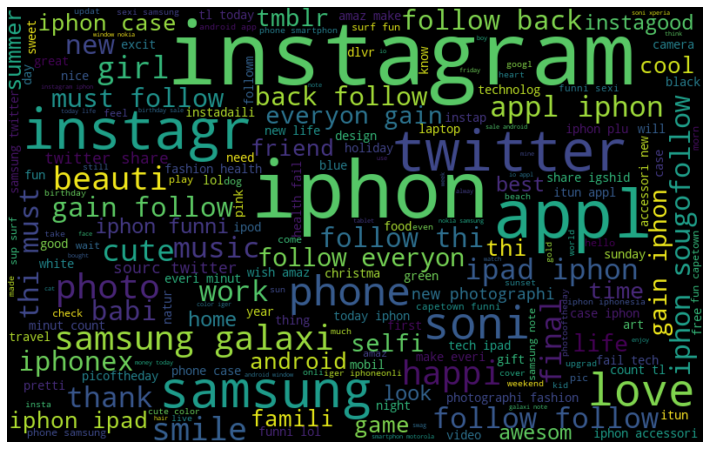

In [89]:
# Filtering all frequent words from the data to plot graph using the wordcloud
# The plot displaying many positive words and a few negative words 
# plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

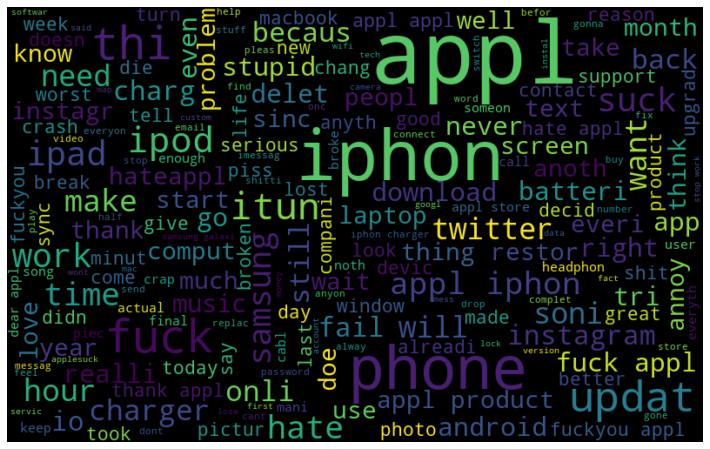

In [90]:
# For the negative sentiment it’s exactly the same code but changing the value of label to one (1), filtering racist/sexist words used.

all_words = " ".join([sentence for sentence in data['cleaned_tweet'][data['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [91]:
# Extracting Hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags


In [92]:
# extract hashtags from positive tweets
ht_positive = hashtag_extract(data['cleaned_tweet'][data['label']==0])
# extract hashtags from negative tweets
ht_negative = hashtag_extract(data['cleaned_tweet'][data['label']==1])

In [93]:
ht_positive[:5]


[['fingerprint',
  'pregnanc',
  'android',
  'app',
  'beauti',
  'cute',
  'health',
  'iger',
  'iphoneonli',
  'iphonesia',
  'iphon'],
 ['yay', 'soni', 'xperia', 'sonyexperia'],
 ['talk',
  'makememori',
  'unplug',
  'relax',
  'iphon',
  'smartphon',
  'wifi',
  'connect'],
 ['iphon', 'cute', 'daventri', 'home'],
 ['instap', 'instadaili', 'soni', 'xperia', 'xperiaz']]

In [94]:
# Filtering and cleaning the words in the sentence for a better visualization and processing
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_positive[:5]

['fingerprint', 'pregnanc', 'android', 'app', 'beauti']

In [95]:
# Conversion of the dictionary into a dataframe to list positive hashtags with count

import nltk
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head(20)

,Hashtag,Count
0,fingerprint,4
1,pregnanc,1
2,android,335
3,app,198
4,beauti,286
5,cute,297
6,health,117
7,iger,148
8,iphoneonli,132
9,iphonesia,137


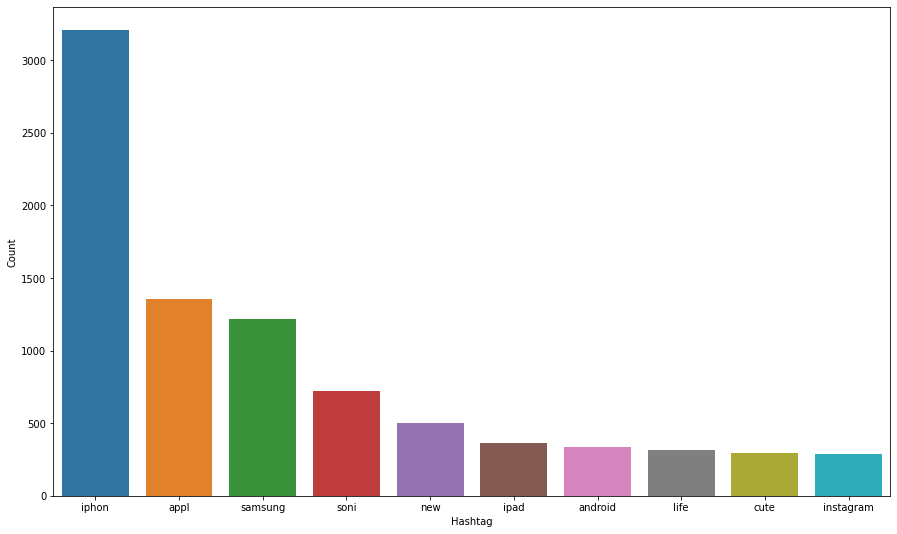

In [96]:
# select top 10 positive hashtags and plot using seaborn bar 
import seaborn as sns
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [97]:
# Conversion of the dictionary into a dataframe to list negative hashtags with count
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head(10)

,Hashtag,Count
0,appl,794
1,drinkyourhaterad,1
2,cellcom,1
3,depress,2
4,idontwantto,1
5,hateorang,2
6,iphon,242
7,suck,41
8,truth,2
9,truthbetold,1


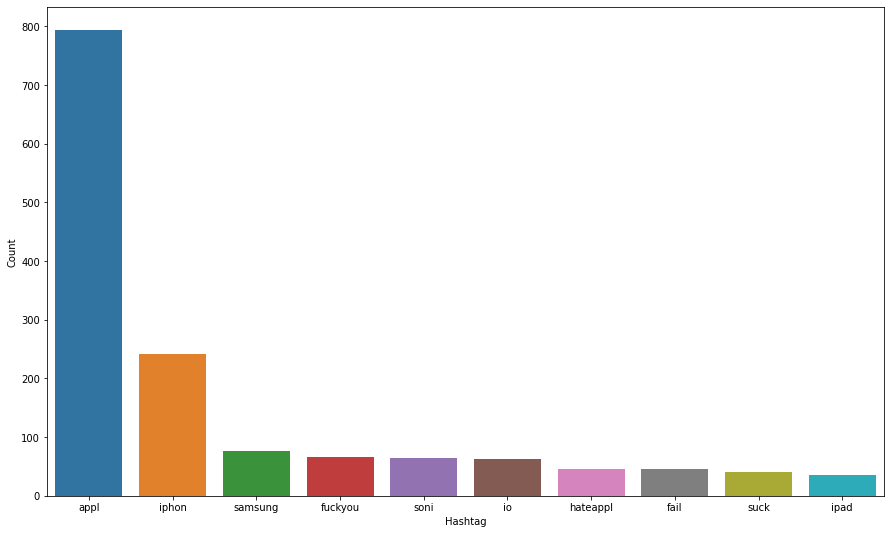

In [98]:
# select top 10 negative hashtags and plot bar
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Splitting Data

In [99]:
# Extraction of the data into vectors for training and testing
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
x = bow_vectorizer.fit_transform(data['cleaned_tweet'])
y = data['label']

In [100]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

Model Training

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [102]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [103]:
pred = model.predict(x_test)
print("f1 score :",f1_score(y_test, pred))
print("accuracy score :",accuracy_score(y_test, pred))

f1 score : 0.7800369685767098
accuracy score : 0.8797979797979798
